## Task-2 From the given ‘Iris’ dataset, predict the optimum number of clusters and represent       it visually.
     
    

## Submitted by: Lokesh Bhirud

Unsupervised learning involves building a machine learning algorithm that can draw inferences from datasets without labelling the responses. In other words, classifying the datasets into clusters using the training set and later using the trained model to identify which cluster the test data will automatically go into.

K-means clustering is a very good technique to carry out unsupervised learning. This involves splitting the dataset into K number of clusters. Then random but unique centroids are chosen for each cluster and that is used to train the KNN classifier. This classifier is used to build the initial random set of clusters. Thereafter the centroid keeps adjusting itself to the mean of the clusters and this is a process that goes on for several iterations till the centroid stabilizes.

In this notebook, I have demonstrated basic clustering on Iris dataset with 150 rows as well gone a step further with the churn dataset that requires a bit more technique in terms of feature engineering while dealing with a fairly large dataset with over 7000 rows and 10+ features

In [1]:
#Step-1 importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Step-2 Reading dataset

data= pd.read_csv("C:/Users/LOKESH ARUN BHIRUD/Desktop/The Sparks Foundation/Data Science and Business Analytics/Task 2 Unsupervised/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Step-4 since this is unsupervised ML, we will remove the output label

data_df= data.iloc[:,:-1]
data_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [4]:
#Step-5 Finding the optimum number of cluster for k-means

x = data_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

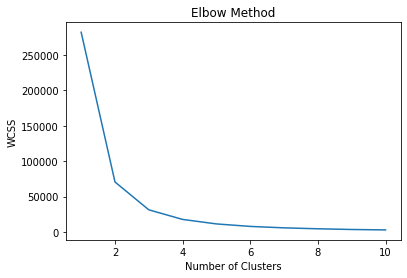

In [5]:
#Step-6 Now plotting results in a graph

plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') #within cluster of sum squares
plt.show()

We see the elbow at 3 hence n_clusters or number of clusters is 3

In [6]:
#Step-7 Applying k-means to datset

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


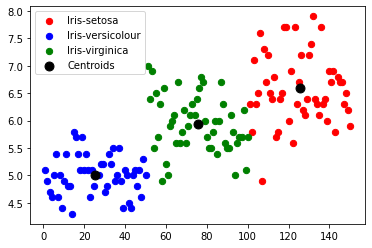

In [11]:
#Step-8 Visualising the clusters - On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 40, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 40, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 40, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 80, c = 'black', label = 'Centroids')

plt.legend()
plt.show()

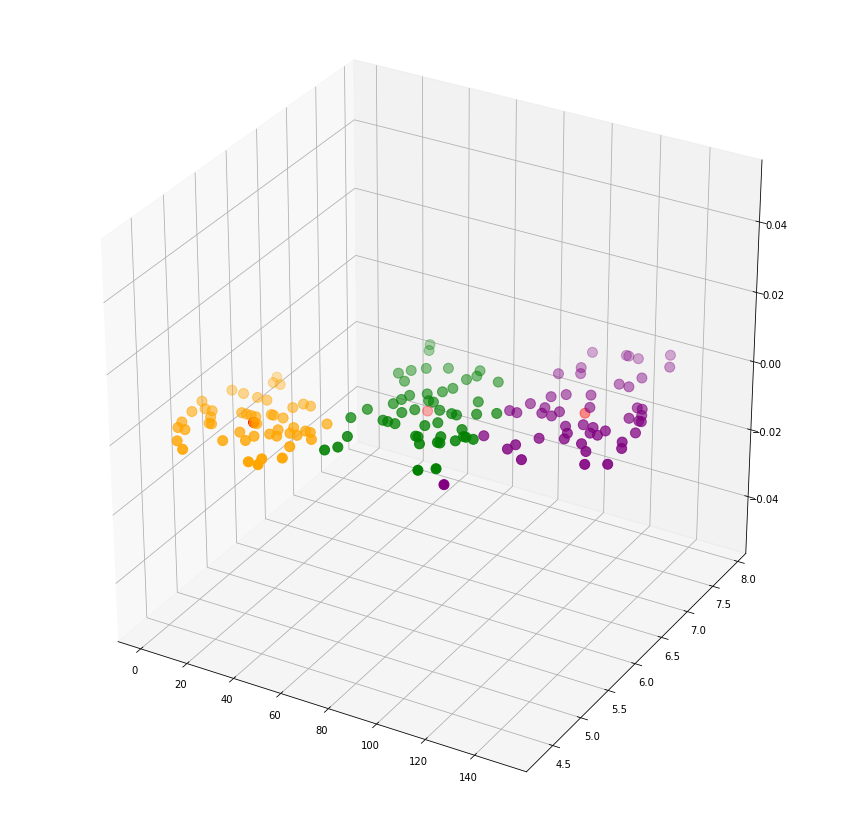

In [13]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

-----

# Thank You